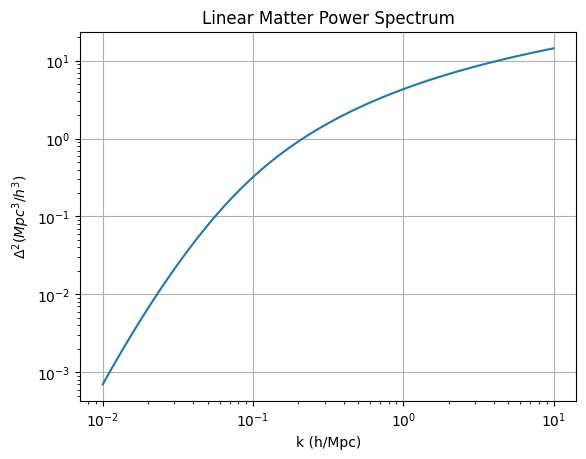

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define cosmological parameters
Omega_M = 0.308   # Matter density parameter
h = 0.6774        # Hubble constant (H0 = 100 h km/s/Mpc)
n_s = 0.9667      # Spectral index
A_s = 2.1e-9      # Amplitude of the primordial power spectrum
k_pivot = 0.05    # Pivot scale in Mpc^-1

# Define wavenumber array
k = np.logspace(-2.0, 1.0, 500)

# Shape parameter
Gamma = Omega_M * h

# BBKS Transfer function
def T_BBKS(k, Gamma):
    q = k / Gamma
    L0 = np.log(1 + 2.34 * q) / (2.34 * q)
    C0 = 1 + 3.89 * q + (16.1 * q)**2 + (5.46 * q)**3 + (6.71 * q)**4
    return L0 * C0**-0.25

# Dimensionless power spectrum
def Delta2_k(k, A_s, n_s, k_pivot, H0, Gamma):
    T_k = T_BBKS(k, Gamma)
    return A_s * (k / k_pivot)**(n_s - 1) * (k / H0)**4 * T_k**2

# Calculate the linear matter power spectrum
Delta2 = Delta2_k(k, A_s, n_s, k_pivot, 100 * h, Gamma)
Pk = Delta2 * (2*np.pi**2)/k**3

# Plot the linear matter power spectrum
plt.figure()
plt.loglog()
plt.xlabel('k (h/Mpc)')
plt.ylabel('$\Delta^2 (Mpc^3/h^3)$')
plt.plot(k, Delta2, '-')
plt.title('Linear Matter Power Spectrum')
plt.grid(True)
plt.show()
